# Lab 4

## import libraries

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


## connect to database

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur = conn.cursor()

### 3.1

In [4]:
df_student=pandas.read_sql_query('select * from gp20.student',conn)
df_student[:]

,s_email,s_name,s_major
0,abcde@jmu.edu,ana,intelligence analysis
1,fghij@jmu.edu,franny,statistics
2,klmno@jmu.edu,kyle,biology
3,pqrst@jmu.edu,peter,intelligence analysis


### 3.2

In [5]:
sql_statement = """ select gp20.professor.p_name,
                            gp20.course.c_name
            from gp20.professor
            inner join gp20.course
            on gp20.professor.p_email = gp20.course.p_email"""

In [6]:
df_prof=pandas.read_sql_query(sql_statement,conn)
df_prof[:]

,p_name,c_name
0,orrlandrew danzell,national security
1,timothy walton,hypothesis testing
2,new_p,new_c_name
3,new_p,data mining
4,p7,wmd
5,new_p,seminar


### 3.3

In [7]:
sql_statement1 = """ select c_number,
                    count(c_number) as enrolled
                    from gp20.enroll_list
                    group by c_number
                    order by enrolled desc"""

<AxesSubplot:xlabel='c_number'>

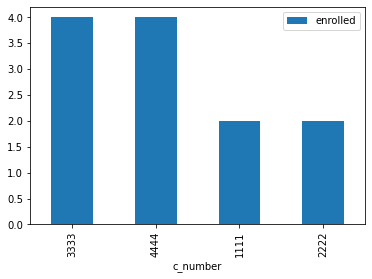

In [8]:
df_price=pandas.read_sql_query(sql_statement1 , conn)

df_price.plot.bar(x='c_number',y='enrolled')

### 3.4

In [9]:
sql_statement2 = """ select p_name,
                    count(gp20.course.c_name) as teaching_number
                    from gp20.professor
                    inner join gp20.course
                    on gp20.professor.p_email = gp20.course.p_email
                    group by professor.p_name
                    order by teaching_number desc"""

<AxesSubplot:xlabel='p_name'>

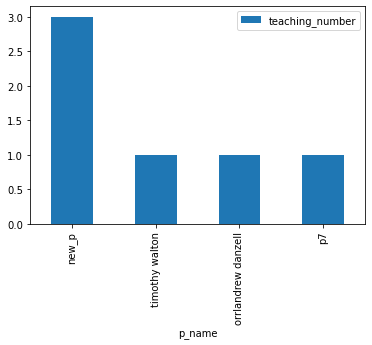

In [10]:
df_price=pandas.read_sql_query(sql_statement2 , conn)

df_price.plot.bar(x='p_name',y='teaching_number')

### 3.5

In [20]:
sql_statement4 = """
                insert into gp20.professor(p_email,p_name,p_office)
                values('{}','{}','{}')
                                
                """.format('p@jmu.edu','p','99')

print(sql_statement4)


                insert into gp20.professor(p_email,p_name,p_office)
                values('p@jmu.edu','p','99')
                                
                


In [25]:
conn.rollback()

In [21]:
cur.execute(sql_statement4)

In [22]:
conn.commit()

In [26]:
sql_statement5 = """
                insert into gp20.course(c_number,c_name,c_room,p_email)
                values('{}','{}','{}','{}')
                                
                """.format('5556','wmd','isat123','p7@jmu.edu')
print(sql_statement5)


                insert into gp20.course(c_number,c_name,c_room,p_email)
                values('5556','wmd','isat123','p7@jmu.edu')
                                
                


In [27]:
cur.execute(sql_statement5)

In [28]:
conn.commit()

In [29]:
df_prof1=pandas.read_sql_query('select * from gp20.professor',conn)
df_prof1[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,orrlandrew danzell,isat/cs107
1,waltontr@jmu.edu,timothy walton,isat/cs326
2,new_p@jmu.edu,new_p,new_office
3,rabb@jmu.edu,rabb,isat312
4,julian@jmu.edu,julian,isat1010
5,tayler@jmu.edu,tayler,isat1011
6,p6@jmu.edu,p6,66
7,p7@jmu.edu,p7,77
8,p8@jmu.edu,p8,88
9,p@jmu.edu,p,99


In [30]:
df_prof1=pandas.read_sql_query('select * from gp20.course',conn)
df_prof1[:]

,c_number,c_name,c_room,p_email
0,2222,national security,isat/cs222,danzelox@jmu.edu
1,4444,hypothesis testing,isat/cs444,waltontr@jmu.edu
2,ia_new,new_c_name,online,new_p@jmu.edu
3,1111,data mining,isat/cs111,new_p@jmu.edu
4,5555,wmd,isat123,p7@jmu.edu
5,3333,seminar,engeo333,new_p@jmu.edu
6,5556,wmd,isat123,p7@jmu.edu


### 3.6

In [102]:
sql_statement6 = """
                update gp20.course
                set p_email = '{}'
                where p_email = '{}'
               
                """.format ('new_p@jmu.edu' , 'marrinsp@jmu.edu')


In [103]:
cur.execute(sql_statement6)

In [104]:
conn.commit()

In [106]:
df_c=pandas.read_sql_query('select * from gp20.course',conn)
df_c[:]

,c_number,c_name,c_room,p_email
0,2222,national security,isat/cs222,danzelox@jmu.edu
1,4444,hypothesis testing,isat/cs444,waltontr@jmu.edu
2,ia_new,new_c_name,online,new_p@jmu.edu
3,1111,data mining,isat/cs111,new_p@jmu.edu
4,5555,wmd,isat123,p7@jmu.edu
5,3333,seminar,engeo333,new_p@jmu.edu


In [107]:
sql_statement7 = """
                delete from gp20.professor
                where p_email = '{}'
                
                """.format('marrinsp@jmu.edu')

In [108]:
cur.execute(sql_statement7)

In [109]:
conn.commit()

In [110]:
df_p=pandas.read_sql_query('select * from gp20.professor',conn)
df_p[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,orrlandrew danzell,isat/cs107
1,waltontr@jmu.edu,timothy walton,isat/cs326
2,new_p@jmu.edu,new_p,new_office
3,rabb@jmu.edu,rabb,isat312
4,julian@jmu.edu,julian,isat1010
5,tayler@jmu.edu,tayler,isat1011
6,p6@jmu.edu,p6,66
7,p7@jmu.edu,p7,77
8,p8@jmu.edu,p8,88


In [31]:
cur.close()

In [32]:
conn.close()